# "Human Learning" with iris data #

Can you predict the species of an iris using petal and sepal measurements?

### TASKS: ###

1. Read iris data into a pandas DataFrame, including column names.

2. Gather some basic information about the data.

3. Use groupby, sorting, and/or plotting to look for differences between species.

4. Come up with a set of rules that could be used to predict species based upon measurements.



### Pandas ###

An open source data analysis library for the python programming language. 

It's like a Excel but with super powers

http://pandas.pydata.org/

Tutorial: https://pandas.pydata.org/pandas-docs/stable/tutorials.html#lessons-for-new-pandas-users

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Task 1
Read the data file

In [13]:
# read the iris data into a pandas DataFrame, including column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   names=col_names)

iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

## TASK 2

Gather basic information about the data

In [5]:
# iris.shape
# iris.head()
# iris.describe()
# iris.species.value_counts()
# iris.dtypes
# iris.isnull().sum()

(150, 5)

## TASK 3
Use groupby, sorting, and/or plotting to look for differences between species.

In [7]:
iris.groupby('species').sepal_length.mean()
# iris.groupby('species').mean()
# iris.groupby('species').describe()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ae08d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bd47550>]], dtype=object)

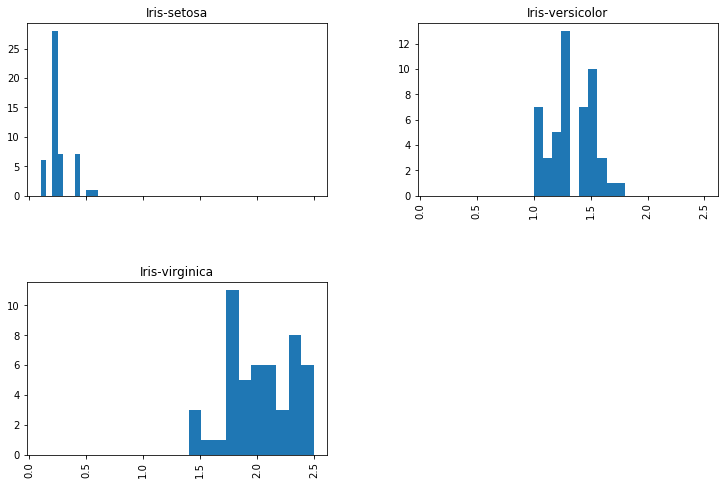

In [41]:
iris.petal_width.hist(by=iris.species, sharex=True, figsize=(12, 8))

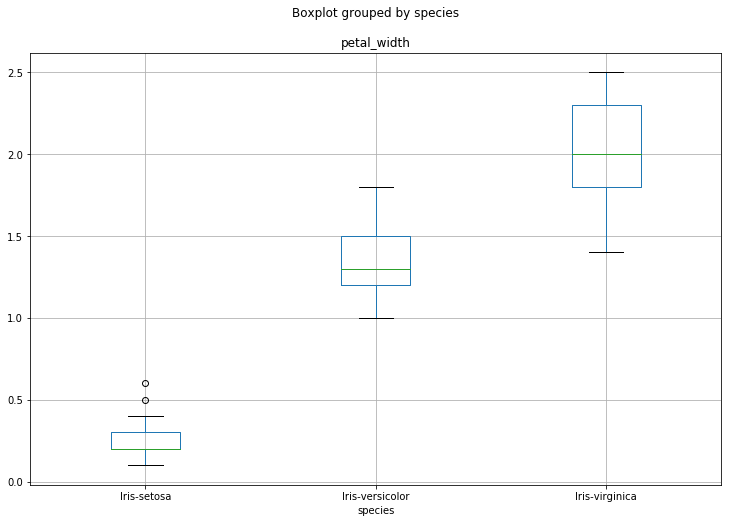

In [40]:
iris.boxplot(column='petal_width', by='species', figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ae296d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b9f2c50>]], dtype=object)

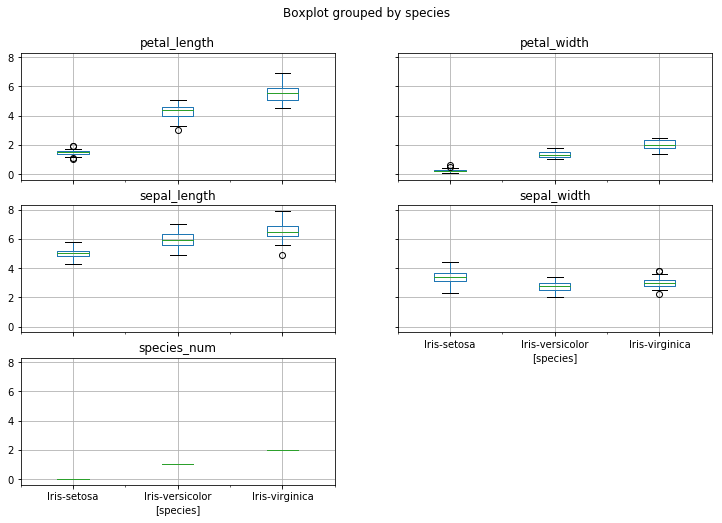

In [39]:
iris.boxplot(by='species', figsize=(12, 8))

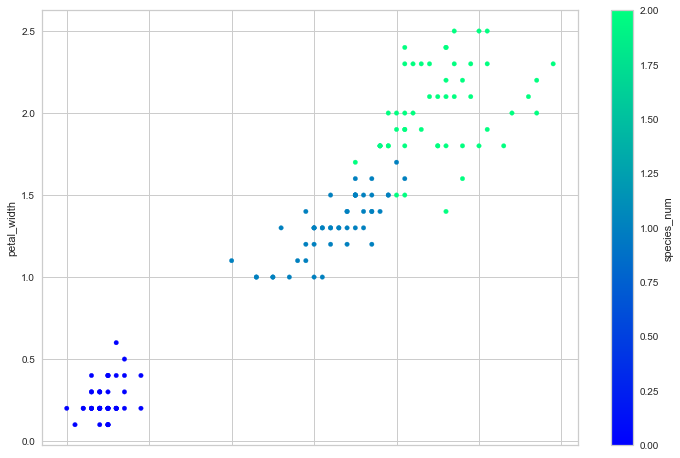

In [57]:
plot = iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='winter', figsize=(12, 8))


/Users/ndanielsen/.pyenv/versions/3.6.3/envs/njcodenight/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b951160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c16e9b0>]], dtype=object)

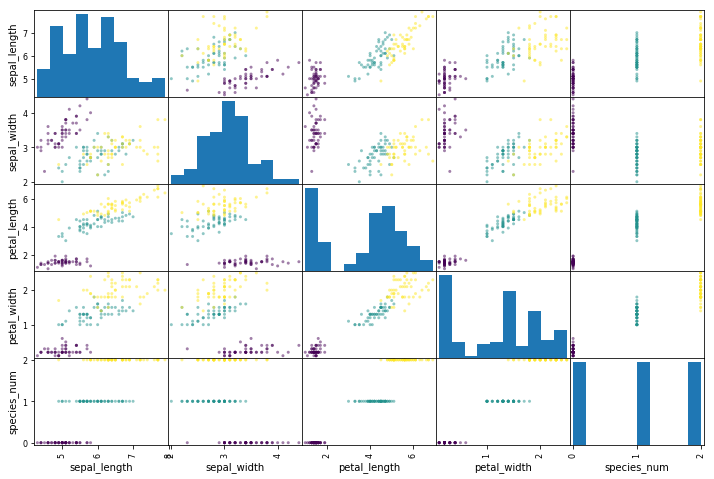

In [34]:
pd.scatter_matrix(iris, c=iris.species_num, figsize=(12, 8))


## Yellowbrick ##

A machine learning visualization library that contribute to and maintain.


http://www.scikit-yb.org/en/latest/index.html


In [44]:
from yellowbrick.features import ParallelCoordinates


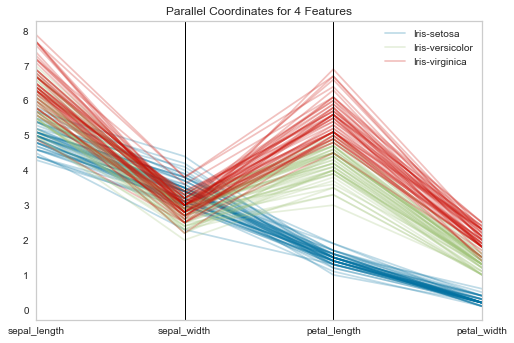

In [47]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


X = iris[features].as_matrix()
y = iris.species_num.as_matrix()


visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

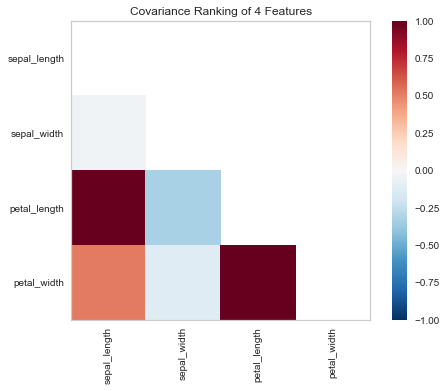

In [53]:
from yellowbrick.features import Rank2D

# A two dimensional ranking of features utilizes a ranking algorithm 
# that takes into account pairs of features at a time
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data